<a href="https://colab.research.google.com/github/vimukthijayasanka/Artificial-Neural-Networks/blob/main/Regression_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vimjayasanka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 13.4MB/s]

In [ ]:
data = pd.read_csv("random-linear-regression/test.csv")

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
X = data["x"]
y = data["y"]

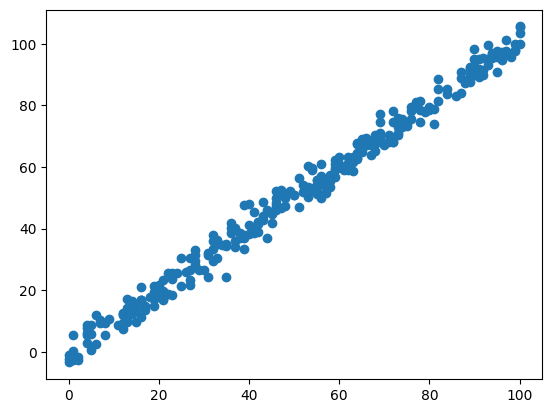

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


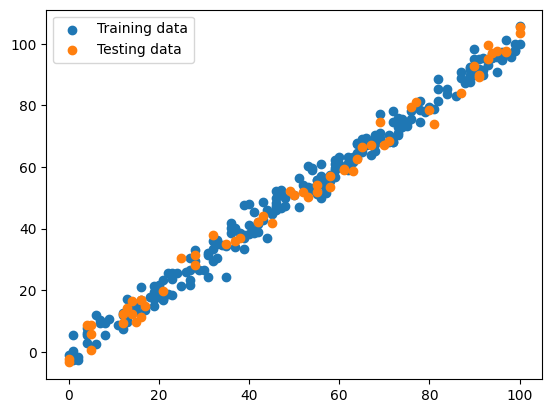

In [ ]:
plt.scatter(X_train,y_train,label="Training data")
plt.scatter(X_test,y_test,label="Testing data")
plt.legend()
plt.show()

# Model Building

In [ ]:
#create a model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(64,input_shape=(1,),activation='leaky_relu'), #Hidden layer
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1) #Output layer
          ])
#Compile model
model.compile(loss = tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(lr=0.05),
              metrics=['mae'])

#Train model
history = model.fit(tf.expand_dims(X_train,axis=1), y_train,epochs=10)

Epoch 1/10
8/8 [==============================] - 1s 6ms/step - loss: 40.3430 - mae: 40.3430
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 25.4382 - mae: 25.4382
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 9.8334 - mae: 9.8334
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 4.6876 - mae: 4.6876
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 3.8330 - mae: 3.8330
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 3.2244 - mae: 3.2244
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 2.6760 - mae: 2.6760
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 2.4776 - mae: 2.4776
Epoch 9/10
8/8 [==============================] - 0s 6ms/step - loss: 2.4645 - mae: 2.4645
Epoch 10/10
8/8 [==============================] - 0s 6ms/step - loss: 2.4097 - mae: 2.4097


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                128       
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 789 (3.08 KB)
Trainable params: 789 (3.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_predictions = model.predict(X_test)
y_predictions[:5]

2/2 [==============================] - 0s 5ms/step


array([[91.220726 ],
       [77.118095 ],
       [95.25005  ],
       [ 5.5969644],
       [92.228065 ]], dtype=float32)

In [ ]:
y_test[:5]

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

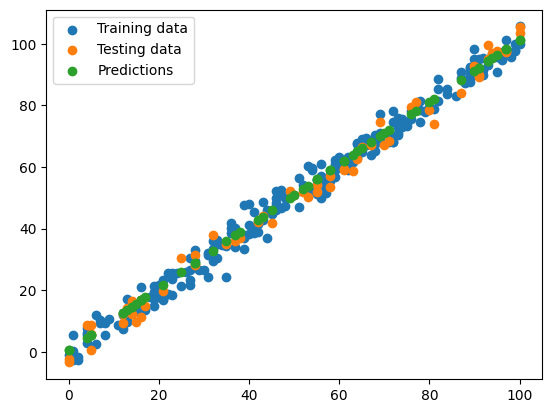

In [ ]:
plt.scatter(X_train,y_train,label="Training data")
plt.scatter(X_test,y_test,label="Testing data")
plt.scatter(X_test,y_predictions,label="Predictions")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 2.6380 - mae: 2.6380


[2.6379945278167725, 2.6379945278167725]

In [ ]:
y_predictions.shape

(60, 1)

In [ ]:
y_test.shape

(60,)

In [ ]:
#using MAE
mae= tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_predictions))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.6379945>

In [ ]:
#using MSE
mse= tf.metrics.mean_squared_error(y_test,tf.squeeze(y_predictions))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=10.076193>

In [ ]:
history.history

{'loss': [40.34300231933594,
  25.438203811645508,
  9.833416938781738,
  4.687566757202148,
  3.8329970836639404,
  3.2243638038635254,
  2.6759982109069824,
  2.4775984287261963,
  2.4644973278045654,
  2.4096853733062744],
 'mae': [40.34300231933594,
  25.438203811645508,
  9.833416938781738,
  4.687566757202148,
  3.8329970836639404,
  3.2243638038635254,
  2.6759982109069824,
  2.4775984287261963,
  2.4644973278045654,
  2.4096853733062744]}

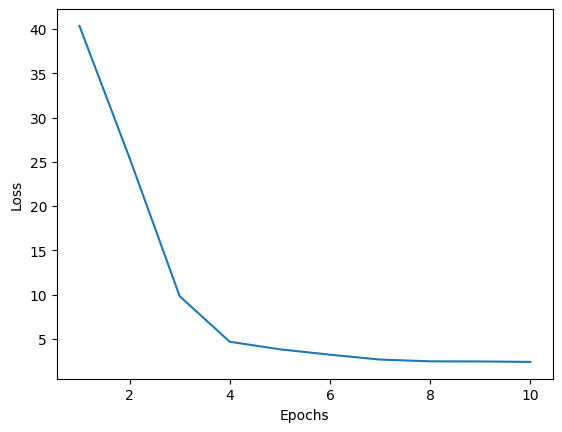

In [ ]:
epochs = 10
x_range = range(1,epochs+1)
loss = history.history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(x_range,loss)
plt.show()

In [ ]:
for layer in model.layers:
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print(f'\nweights:\n {weights} \nBiases:\n {biases}')


weights:
[[-0.04005352  0.28466472 -0.24235371 -0.0748601  -0.14234357  0.13798107
   0.15784599 -0.20254996 -0.07896072 -0.09026456 -0.25044212 -0.30249447
  -0.06134335 -0.19972515  0.2182568  -0.18303733  0.27502152  0.16992979
   0.17125645  0.05216242 -0.12599607 -0.28940335 -0.12065452 -0.24914959
   0.27999705 -0.18753399 -0.23734923  0.02733563  0.18761253 -0.20342104
  -0.06970204 -0.14373386 -0.26989025  0.15989158  0.09413006  0.20256564
   0.27270755  0.1929871  -0.04913496  0.19102365  0.18721032 -0.03672398
  -0.11661687  0.01309148  0.19471093 -0.2991712  -0.15656538  0.07146533
  -0.260105    0.14729176 -0.14483912  0.23955074  0.23295245  0.11219472
  -0.16742732  0.17202128  0.08729744  0.22146237  0.13028301  0.1693134
  -0.20516932 -0.25963777 -0.1500985   0.24827853]] 
Biases:
 [ 0.0284839   0.02199838 -0.02239423 -0.02198131  0.02446548 -0.02274119
  0.01966681 -0.01910427 -0.02221446  0.02310422 -0.02184846 -0.02096557
  0.02344142  0.02259725  0.02010598 -0.018